[0]문제정의하기
 y=f(x)
 y:보험료
 x:보험에 영향을 주는 요소들 dataset  에서 columns
 f:회귀모델링(regression)

[1]:라이브러리 불러오기

In [ ]:
### 사용할 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


[1]라이브러리 불러오기

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 로컬 파일 업로드
uploaded = files.upload()

# 업로드한 파일명 확인
for filename in uploaded.keys():
    print('Uploaded file:', filename)

# Pandas DataFrame으로 파일 읽기
import io
df = pd.read_csv(io.StringIO(uploaded[filename].decode('utf-8')))


Saving insurance.csv to insurance.csv
Uploaded file: insurance.csv


[2]데이터 수집하기
데이터 설명:캐글에서 가져온 데이터셋
age:주요 수혜자의 나이
성별:보험계약자의 성별 여성/남성
bmi:신체에 대한 이해를 제공하는 체질량 지수, 키에 비해 상대적으로 높거나 낮은 체중,신장과 체중의 비율을 이용한 객관적인 체중 지수(kg/m^2), 이상적으로는 18.5~24.9

children : 건강보험 적용 자녀 수 / 부양가족 수
smoker:흡연자/비흡연자
charges:건강보험에서 청구하는 개인의료비

In [ ]:
df.head(3)

,age,sex,bmi,children,smoker,charges
0,19,female,27.90,0,yes,16884.9240
1,18,male,33.77,1,no,1725.5523
2,28,male,33.00,3,no,4449.4620


[2-2]데이터에서 변수의 의미를 살펴보기
sex
bmi
children
age
smoker
region
charges


In [ ]:
### 데이터 셋 구조 보기
df.shape

(1338, 6)

In [ ]:
### [결측치] : 비어있는 데이터를 찾습니다.
### 컬럼(변수, 특성, x)에 결측치가 있는지 확인합니다.
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
dtype: int64

In [ ]:
### [data type]을 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 62.8+ KB


In [ ]:
### [통계] 슷지형 변수만 뽑아서 기본 통계를 해 봅니다.
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: >

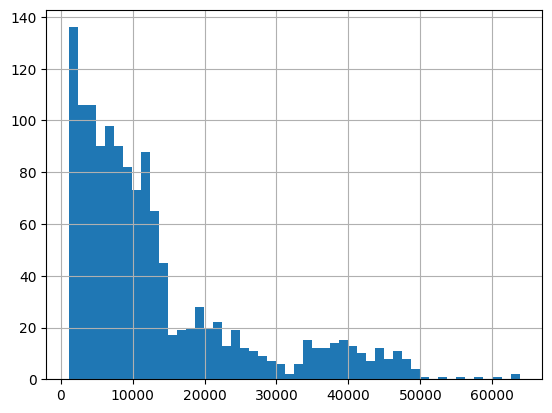

In [ ]:
### [시각화]를 해서 살펴봅니다. 데이터의 분포를 파악할때, 시각화를 추천합니다.

### .hist(): 히스토그램을 의미합니다.
### bins=50:주머니가 50개임을 의미합니다. x가 50개의 그룹으로 나누어 진다라고 이해하셔도 좋습니다.
### x 축은 실제 주택값을 의미합니다.
### y축은 frequency 빈도수입니다.
df['charges'].hist(bins=50)

[3]데이터 탐색하기

In [ ]:
print(len(df.index))
df.head()

1338


,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [ ]:
import pandas as pd


# sex와 smoker 열을 수치형으로 변환
df['sex'] = df['sex'].astype('category').cat.codes
df['smoker'] = df['smoker'].astype('category').cat.codes

#수치형 열 리스트에 sex와 smoker 추가
numerical_columns = ['나이', '수입', 'sex', 'smoker']


In [ ]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


<ipython-input-11-e9e843bcbe78>:11: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[numerical_columns].hist(ax=ax)


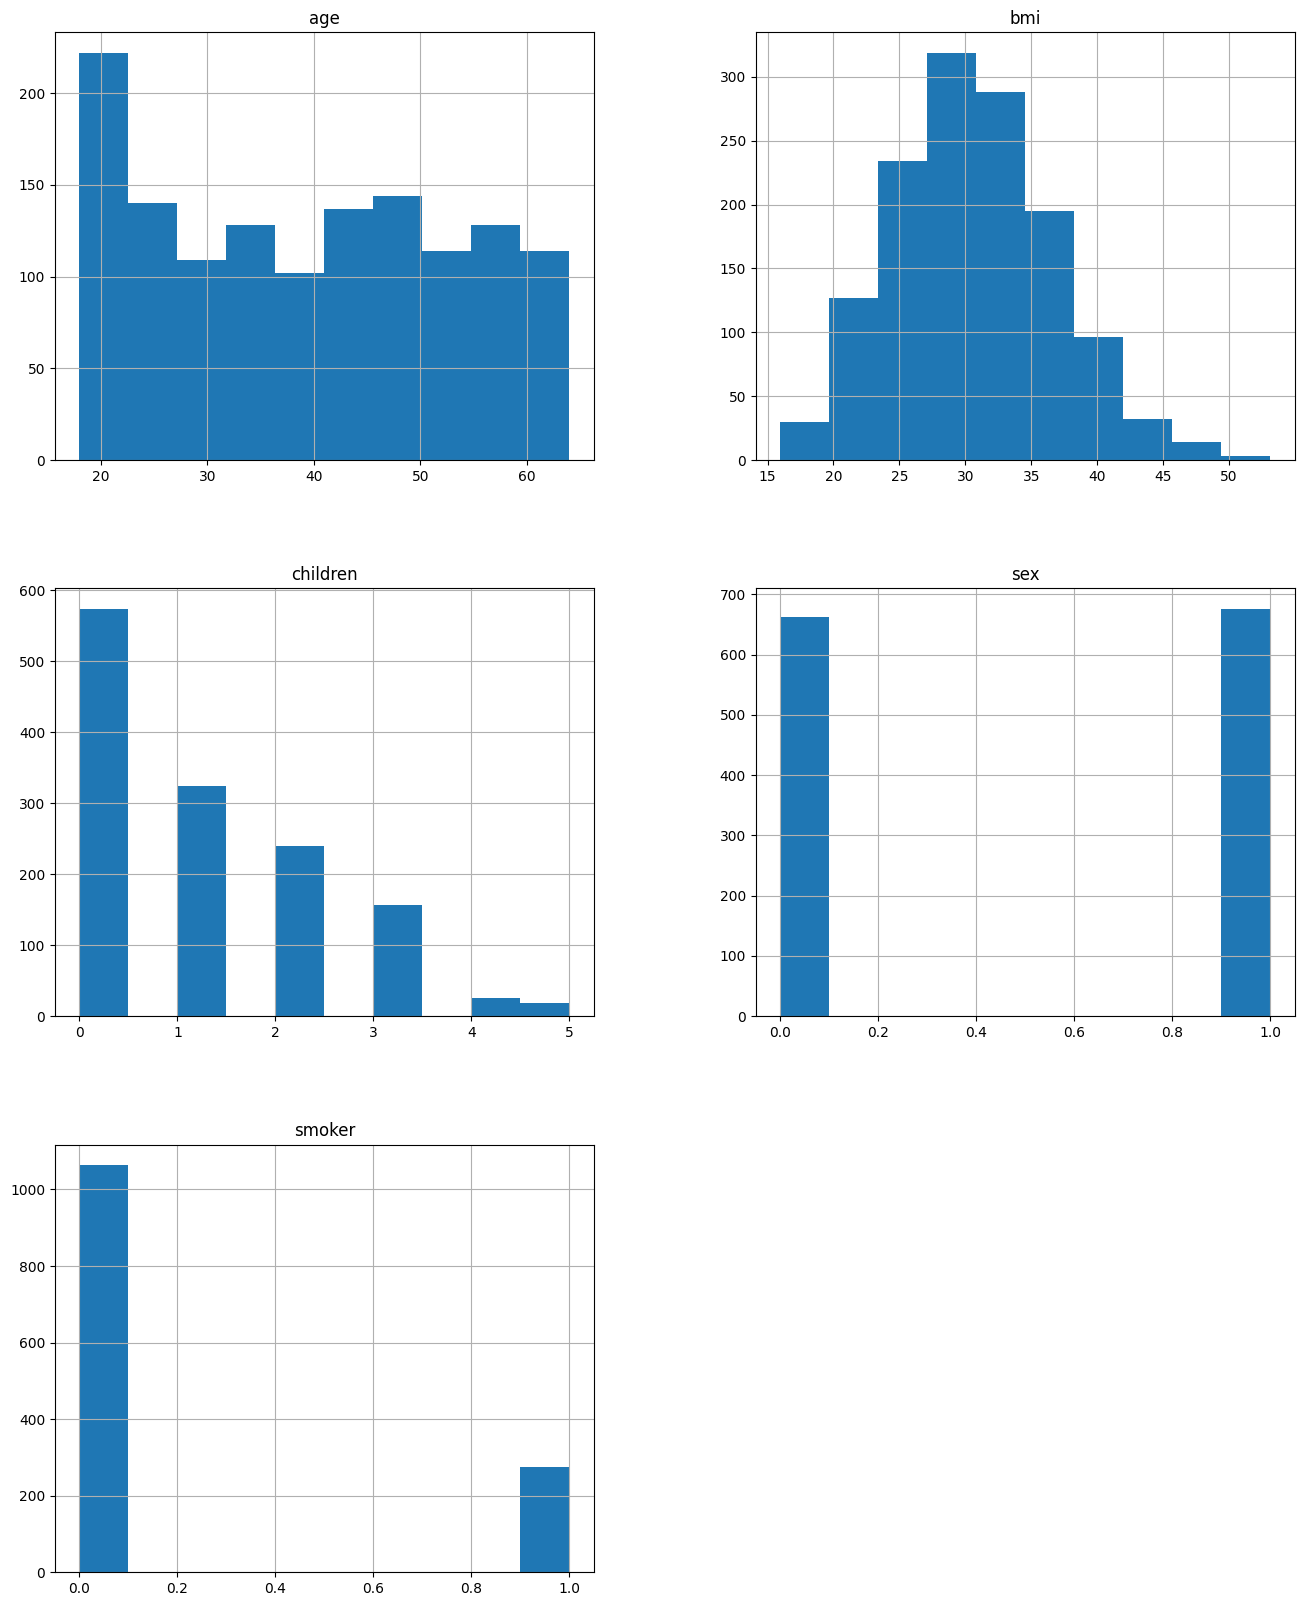

In [ ]:

### numerical features(except "LON" & "LAT") :  LON, LAT: 해당 지역의 경도(Longitudes) 위도(Latitudes) 정보
numerical_columns=['age', 'bmi', 'children', 'sex', 'smoker']

### figsize()는 plot()의 기본 크기를 지정합니다.
fig = plt.figure(figsize = (16, 20))
ax = fig.gca()  # Axes 생성

### gca()
### gca()로 현재의 Axes로 현재의 Figure 객체를 구할 수 있다.

df[numerical_columns].hist(ax=ax)
plt.show()

In [ ]:
### Pearson 상관계수 : 대표적으로 상관관계 분석시 사용하는 지표입니다.
### -1 에서 1 사이의 값을 가진다는 특징이 있습니다.
### 1일 때는 완전 양의 상관(perfect positive correlation),
### -1일 때는 완전 음의 상관관계(perfect negative correlation)관계를 보입니다.
### https://m.blog.naver.com/istech7/50153047118

cols = ['age', 'bmi', 'children', 'sex', 'smoker','charges']

corr = df[cols].corr(method = 'pearson')
corr

,age,bmi,children,sex,smoker,charges
age,1.000000,0.109272,0.042469,-0.020856,-0.025019,0.299008
bmi,0.109272,1.000000,0.012759,0.046371,0.003750,0.198341
children,0.042469,0.012759,1.000000,0.017163,0.007673,0.067998
sex,-0.020856,0.046371,0.017163,1.000000,0.076185,0.057292
smoker,-0.025019,0.003750,0.007673,0.076185,1.000000,0.787251
charges,0.299008,0.198341,0.067998,0.057292,0.787251,1.000000


데이터전처리

[3-1]데이터셋의 기본정보를 파악한다.

In [ ]:
df.shape #행이 1338개 열이 7개 의료비를 예측하는데 사용하는 변수가 7개이다. ??

(1338, 6)

In [ ]:
df.isnull().sum() #결측치 비어있는 데이터를 찾는다. 1338개행의 7개의 변수에 결측치가 없다??.

age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
dtype: int64

In [ ]:
df.info() #data type을 확인한다. .

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int8   
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int8   
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(2), int8(2)
memory usage: 44.6 KB


In [ ]:
df.describe() # 기본통계를 돌려본다.

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


[3-2]종속변수(목표변수)탐색
charges
보험료가 타겟변수가 된다.
이유:보험료 예측이 목적이기 때문이다.

In [ ]:
#[기초통계량]:종속변수의 기초통계량을 삻펴본다.
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

<Axes: >

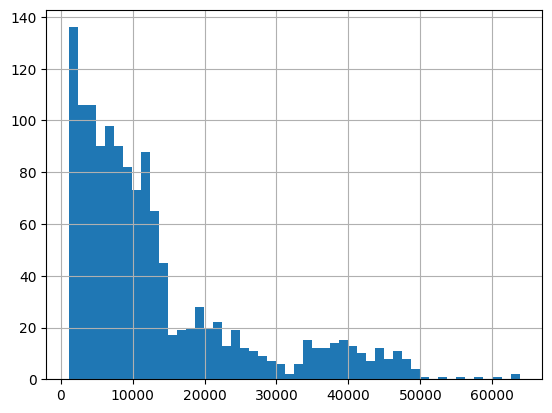

In [ ]:
#시각화를 해서 살펴본다.

df['charges'].hist(bins=50)


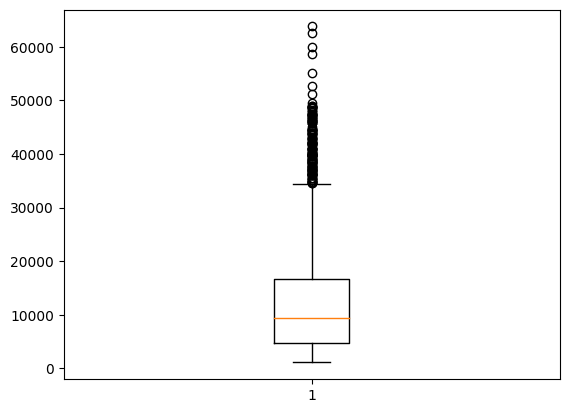

In [ ]:
#boxplot을 이용해 또 다른 시각화의 방법으로 분포를 본다.

plt.boxplot(df['charges'])

plt.show()

[3-3]
설명변수(독립변수/특징변수/속성)탐색

[3-4]: 설명변수와 종속변수 간의 관계 탐색
모든 변수들 간의 관계를 탐색한다.

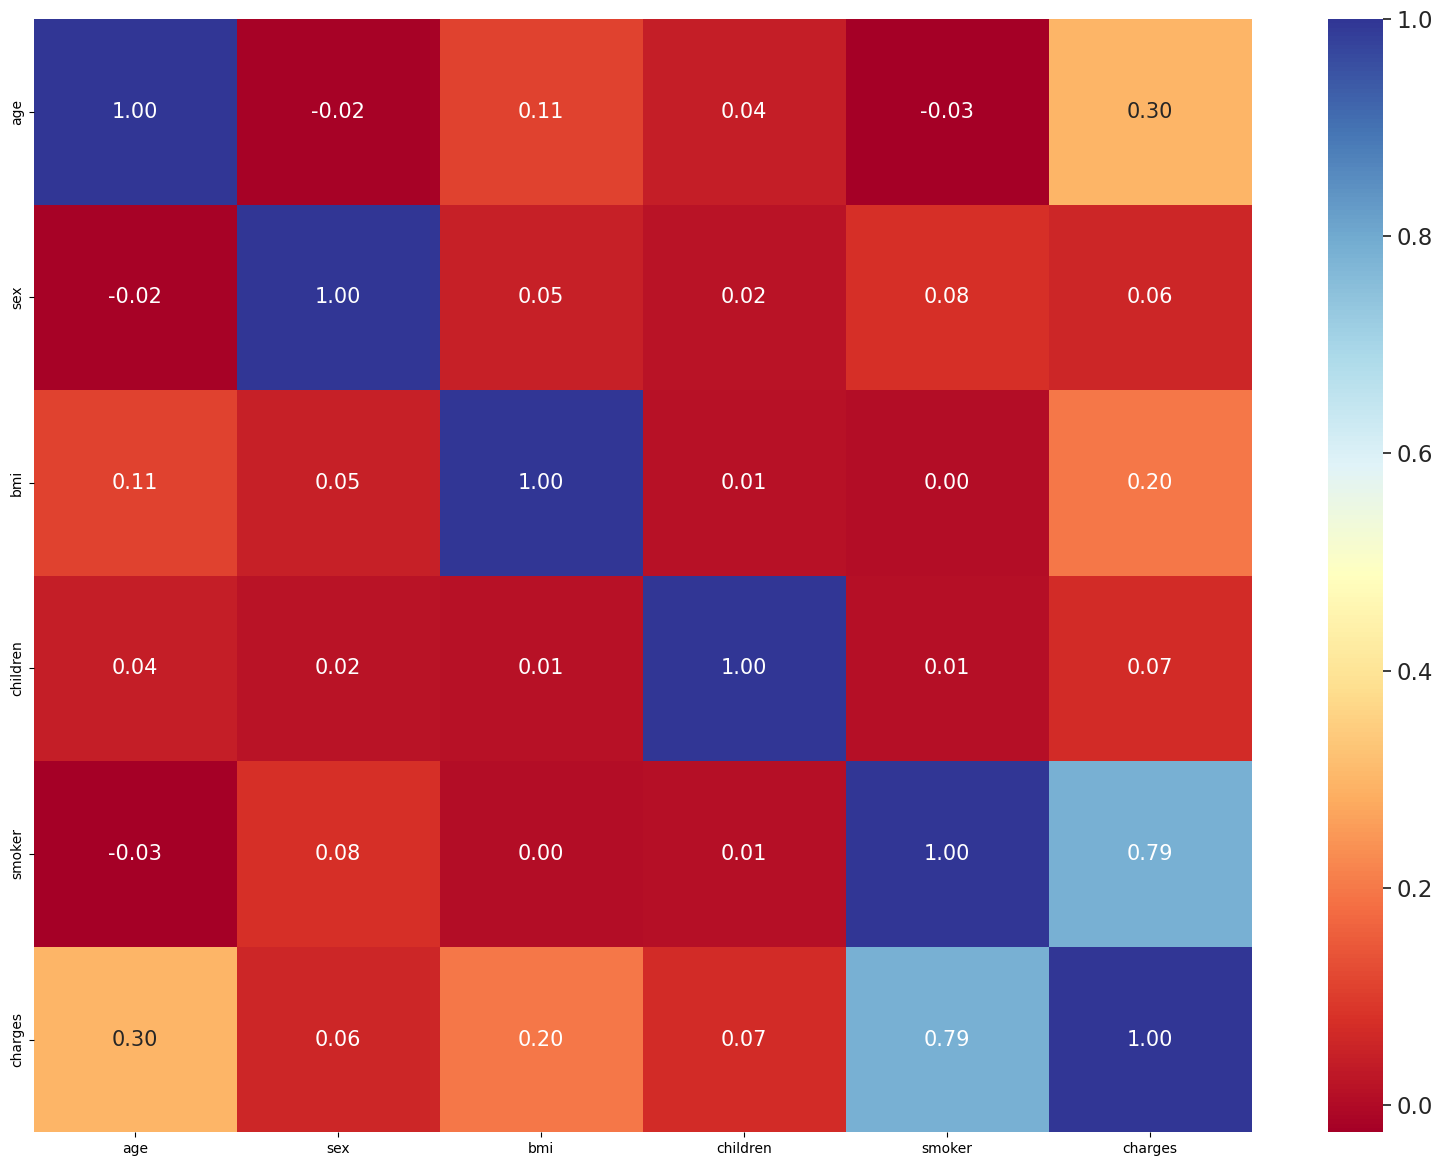

In [ ]:
import seaborn as sns

# 데이터프레임의 상관 행렬 계산
corr = df.corr()

# 플롯 설정
fig = plt.figure(figsize=(16, 12))
ax = fig.gca()

# 히트맵 그리기
sns.set(font_scale=1.5)
heatmap = sns.heatmap(corr.values, annot=True, fmt='.2f', annot_kws={'size': 15},
                      yticklabels=corr.columns, xticklabels=corr.columns, ax=ax, cmap="RdYlBu")

plt.tight_layout()
plt.show()


[3-4-1]설명변수와 종속변수간의 관계탐색 보험료와 나이와의 관계
=>나이가 많을 수록 보험료 지출이 많아진다.

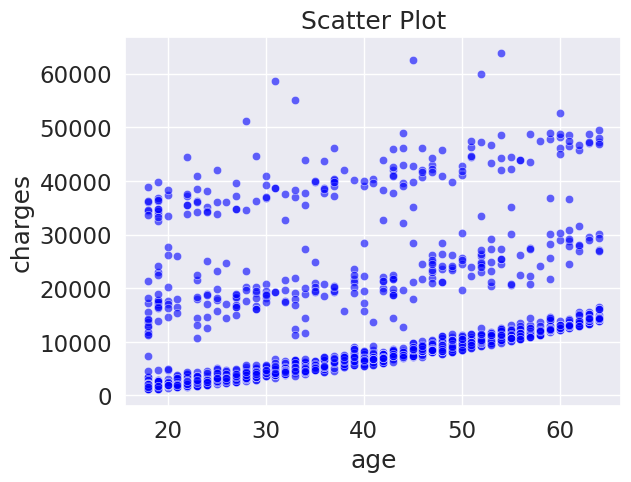

In [ ]:
sns.scatterplot(data=df,x='age',y='charges',markers='o',color='blue',alpha=0.6)
plt.title('Scatter Plot')
plt.show()

[3-4-2]설명변수와 종속변수간의 관계탐색 보험료와 부양아이수와의 관계

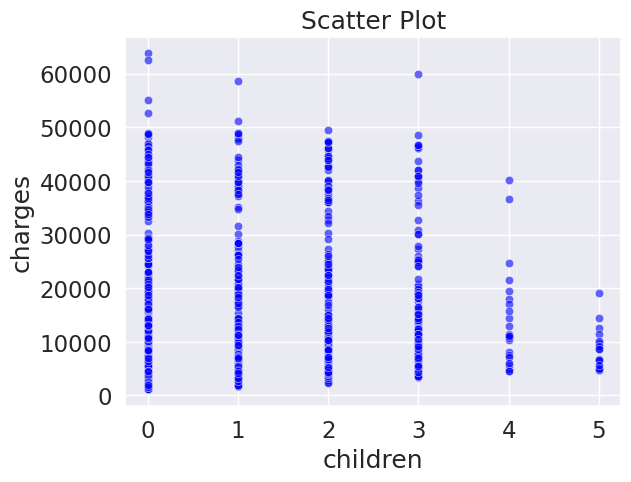

In [ ]:
sns.scatterplot(data=df,x='children',y='charges',markers='o',color='blue',alpha=0.6)
plt.title('Scatter Plot')
plt.show()

[3-4-3]설명변수와 종속변수간의 관계탐색 보험료와 bmi와의 관계


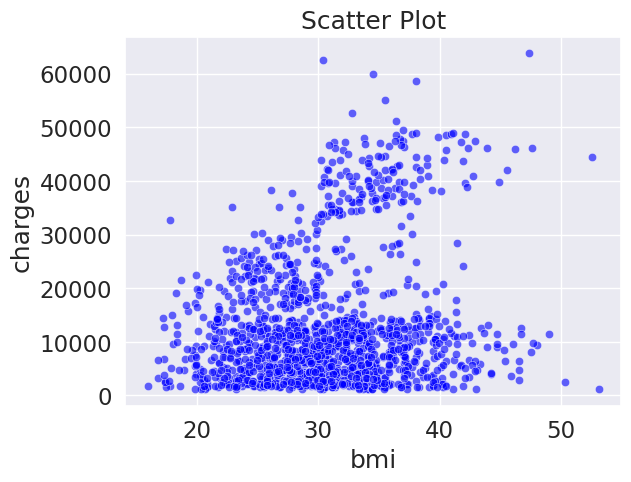

In [ ]:
sns.scatterplot(data=df,x='bmi',y='charges',markers='o',color='blue',alpha=0.6)
plt.title('Scatter Plot')
plt.show()

모델링하기

In [ ]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int8   
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int8   
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(2), int8(2)
memory usage: 44.6 KB


[Scaler]

In [ ]:
### 사이킷런은 파이썬에서 머신러닝 분석을 할 때 유용하게 사용할 수 있는 라이브러리 입니다.
### 여러가지 머신러닝 모듈로 구성되어있습니다.

from sklearn.preprocessing import StandardScaler



scaler = StandardScaler()  # 평균 0, 분산 1
scale_columns = ['age', 'bmi', 'children', 'sex', 'smoker','charges']
df[scale_columns] = scaler.fit_transform(df[scale_columns])

In [ ]:
df.head()   #Scaler 적용전, Table

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [ ]:
df[scale_columns].head() # Scaler 적용 후, Table

,age,bmi,children,sex,smoker,charges
0,-1.438764,-0.453320,-0.908614,-1.010519,1.970587,0.298584
1,-1.509965,0.509621,-0.078767,0.989591,-0.507463,-0.953689
2,-0.797954,0.383307,1.580926,0.989591,-0.507463,-0.728675
3,-0.441948,-1.305531,-0.908614,0.989591,-0.507463,0.719843
4,-0.513149,-0.292556,-0.908614,0.989591,-0.507463,-0.776802


train/test set 나누기

In [ ]:
from sklearn.model_selection import train_test_split

# split dataset into training & test
X = df[numerical_columns]
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train.shape, y_train.shape

((1070, 5), (1070,))

In [ ]:
X_test.shape, y_test.shape

((268, 5), (268,))

In [ ]:
y_train

216    -0.240782
731    -0.264757
866    -1.001941
202    -0.021330
820    -0.481146
          ...   
715    -0.092805
905    -0.719197
1096    2.591451
235     0.510004
1061   -0.141770
Name: charges, Length: 1070, dtype: float64

In [ ]:
X_train

,age,bmi,children,sex,smoker
216,0.982076,-0.666578,-0.908614,-1.010519,-0.507463
731,0.982076,-1.519609,-0.078767,0.989591,-0.507463
866,-1.509965,1.087058,-0.908614,0.989591,-0.507463
202,1.480485,-1.087352,-0.908614,-1.010519,-0.507463
820,0.412467,0.498138,-0.078767,0.989591,-0.507463
...,...,...,...,...,...
715,1.480485,-0.289276,-0.908614,0.989591,-0.507463
905,-0.940356,-0.214635,0.751079,-1.010519,-0.507463
1096,0.839674,0.704834,0.751079,-1.010519,1.970587
235,0.056461,-1.385093,0.751079,-1.010519,1.970587


In [ ]:
df[scale_columns].head()

,age,bmi,children,sex,smoker,charges
0,-1.438764,-0.453320,-0.908614,-1.010519,1.970587,0.298584
1,-1.509965,0.509621,-0.078767,0.989591,-0.507463,-0.953689
2,-0.797954,0.383307,1.580926,0.989591,-0.507463,-0.728675
3,-0.441948,-1.305531,-0.908614,0.989591,-0.507463,0.719843
4,-0.513149,-0.292556,-0.908614,0.989591,-0.507463,-0.776802


In [ ]:
# df_norm_train = df_raw_train.copy()
# # df_norm_train_y = df_norm_train.pop('charges')
# df_norm_train_x = df_norm_train.copy()

다중공선성의 고려

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.round(1)
### 소수점 첫째자리까지 표시합니다. 즉, 소수점 둘째짜리에서 반올림 합니다.
### for i in range(X_train.shape[1]) : train data의 열이 존재하는 동안 반

,features,VIF Factor
0,age,1.0
1,bmi,1.0
2,children,1.0
3,sex,1.0
4,smoker,1.0


In [ ]:
from sklearn import linear_model

# fit regression model in training set
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# predict in test set
pred_test = lr.predict(X_test)

In [ ]:
### print coef
### 계수를 출력합니다.
print(lr.coef_)

[ 0.29948648  0.15353266  0.0404299  -0.00975261  0.79231246]


In [ ]:
### "feature - coefficients" DataFrame 만들기
### zip 키워드는 리스트 2개를 하나로 묶습니다.(결과는 튜플로 됩니다.)
coefs = pd.DataFrame(zip(df[numerical_columns].columns, lr.coef_), columns = ['feature', 'coefficients'])
coefs



### https://m.blog.naver.com/tkdldjs35/221578915290 : zip

,feature,coefficients
0,age,0.299486
1,bmi,0.153533
2,children,0.040430
3,sex,-0.009753
4,smoker,0.792312


In [ ]:
### 크기 순서대로 나열합니다.
### 크기 순서로 나열 : 내림차순으로 합니다. 다만 양, 음을 가리지 않습니다. 절대값을 기준으로 합니다.
### 절대값 기준 함수: coefficients.abs().sort_values

coefs_new = coefs.reindex(coefs.coefficients.abs().sort_values(ascending=False).index)
coefs_new

,feature,coefficients
4,smoker,0.792312
0,age,0.299486
1,bmi,0.153533
2,children,0.040430
3,sex,-0.009753


In [ ]:
### 크기 순서대로 나열합니다.
### 크기 순서로 나열 : 내림차순으로 합니다. 다만 양, 음을 가리지 않습니다. 절대값을 기준으로 합니다.
### 절대값 기준 함수: coefficients.abs().sort_values

coefs_new = coefs.reindex(coefs.coefficients.abs().sort_values(ascending=False).index)
coefs_new

,feature,coefficients
4,smoker,0.792312
0,age,0.299486
1,bmi,0.153533
2,children,0.040430
3,sex,-0.009753


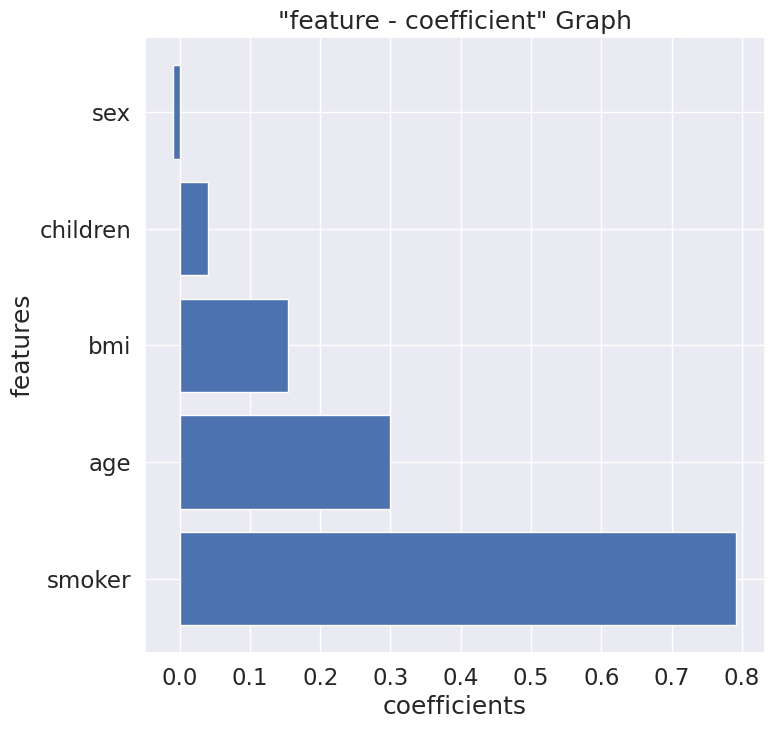

In [ ]:
### coefficients 를 시각화 합니다.

### figure size
plt.figure(figsize = (8, 8))

### bar plot : matplotlib.pyplot 모듈의 barh() 함수를 사용해서 수평 막대 그래프를 그립니다.
plt.barh(coefs_new['feature'], coefs_new['coefficients'])
plt.title('"feature - coefficient" Graph')
plt.xlabel('coefficients')
plt.ylabel('features')
plt.show()

[4-3]:모델해석
[4-3-1]유의성 검정을 한다. 통계에서 변수가 유의하다는 의미이다.

In [ ]:
import statsmodels.api as sm

X_train2 = sm.add_constant(X_train)
### 회귀분석모형 수식을 간단하게 만들기 위해 다음과 같이 상수항을 독립변수 데이터에 추가하는 것을 상수항 결합(bias augmentation)작업이라고 합니다.

### ordinary least square 의 약자로, 거리의 최소값을 기준으로 구하는 함수입니다.
model2 = sm.OLS(y_train, X_train2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     627.2
Date:                Fri, 12 Apr 2024   Prob (F-statistic):          3.52e-314
Time:                        09:34:01   Log-Likelihood:                -781.16
No. Observations:                1070   AIC:                             1574.
Df Residuals:                    1064   BIC:                             1604.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0007      0.015     -0.048      0.962      -0.031       0.029
age            0.2995      0.016     19.202      0.000       0.269       0.330
bmi            0.1535      0.015      9.942      0.000       0.123       0.184
children       0.0404      0.015      2.630      0.009       0.010       0.071
sex           -0.0098      0.015     -0.631      0.528      -0.040       0.021
smoker         0.7923      0.015     51.386      0.000       0.762       0.823
==============================================================================
Omnibus:                      239.860   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              555.395
Skew:                           1.213   Prob(JB):                    2.50e-121
Kurtosis:                       5.563   Cond. No.                         1.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[4-4]모델 해설모델 예측 결과 및 성능 평가
[4-4-1]:모델의 가시화(시각화)


In [ ]:
### 예측 결과 시각화 (test set)
df = pd.DataFrame({'actual': y_test, 'prediction': pred_test})
df = df.sort_values(by='actual').reset_index(drop=True)
df.head()

,actual,prediction
0,-1.002357,-0.825929
1,-1.002269,-0.806536
2,-1.001284,-0.590438
3,-0.992648,-0.929529
4,-0.969488,-0.681614


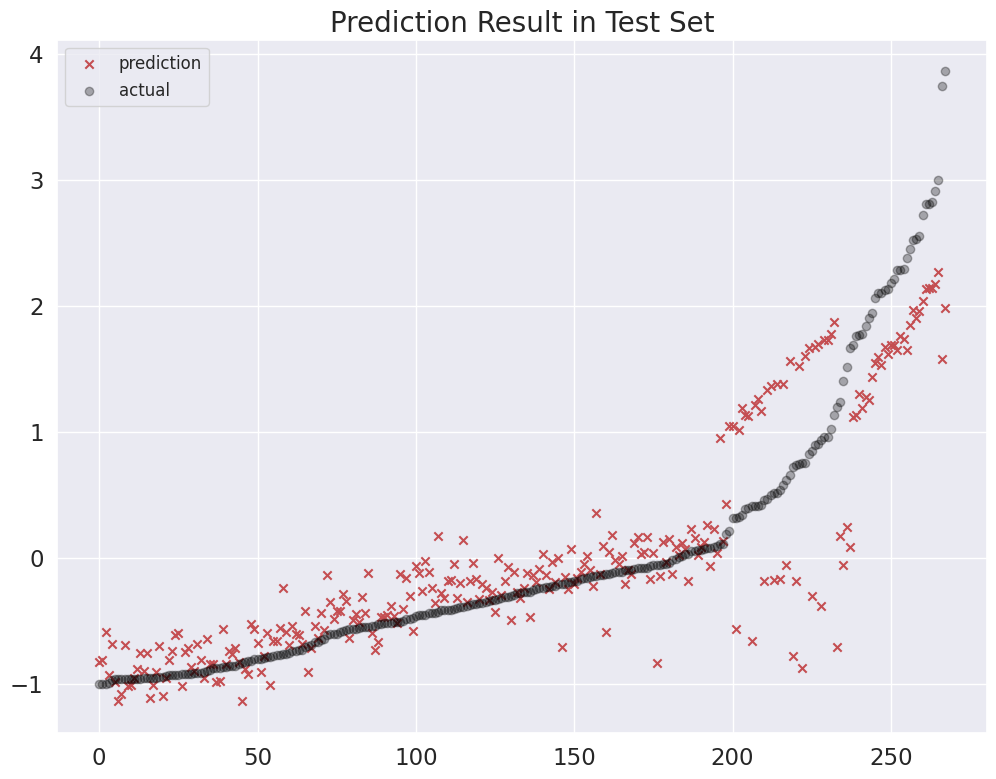

In [ ]:
plt.figure(figsize=(12, 9))
plt.scatter(df.index, df['prediction'], marker='x', color='r')
plt.scatter(df.index, df['actual'], alpha=0.3, marker='o', color='black')
plt.title("Prediction Result in Test Set", fontsize=20)
plt.legend(['prediction', 'actual'], fontsize=12)
plt.show()

[4-4-2]모델의 성능평가(R-squred와 RMSE)

In [ ]:
print(model.score(X_train, y_train))  # training set
print(model.score(X_test, y_test))  # test set

0.7466601137582649
0.760858175073853


In [ ]:
### RMSE(Root Mean Squared Eror)
from sklearn.metrics import mean_squared_error
from math import sqrt

### training set
pred_train = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, pred_train)))

### test set
print(sqrt(mean_squared_error(y_test, pred_test)))

0.5021358289563582
0.49356836961409023
